In [1]:
library(ggplot2)
library(splines)
library(mlmRev)

In [2]:
dsmall<-diamonds[sample(nrow(diamonds),100),]

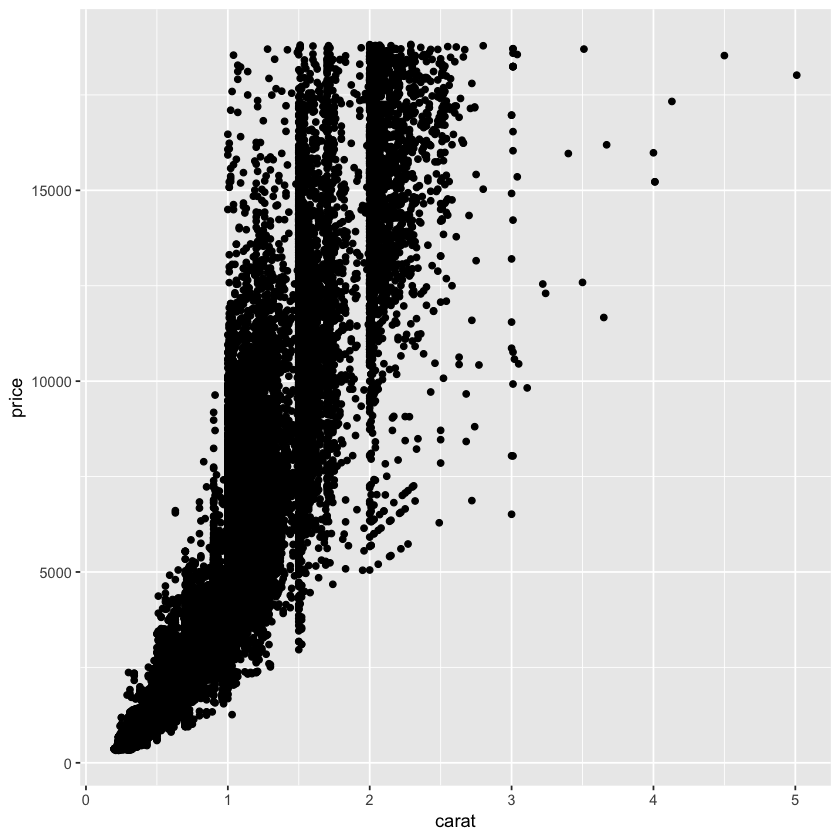

In [3]:
#basic usage of qplot

qplot(carat,price,data=diamonds)

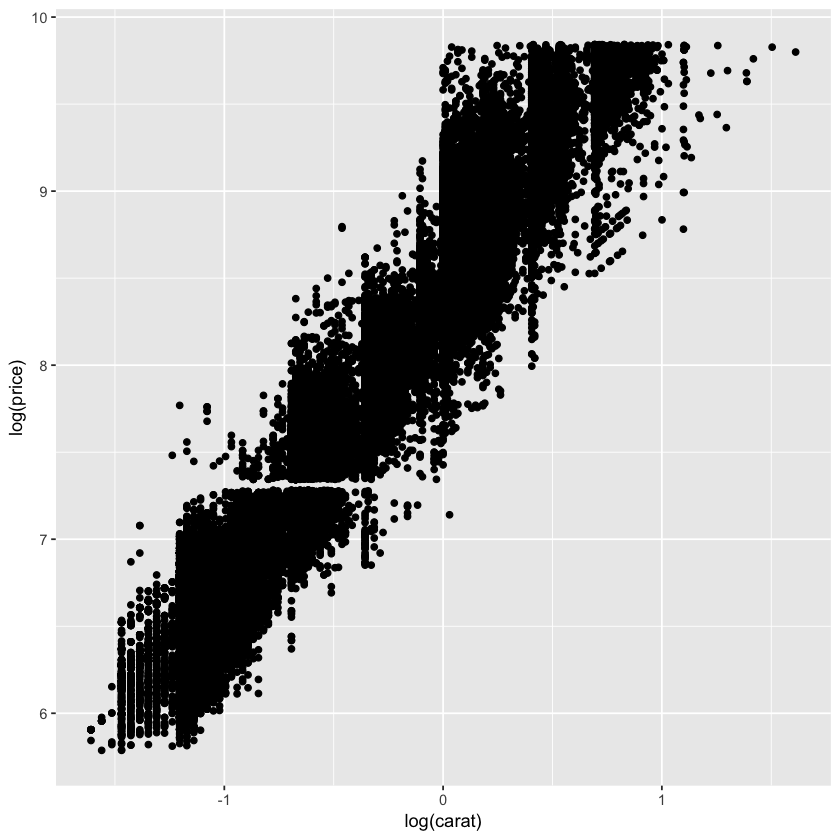

In [4]:
#relationship looks exponential, though, so the first thing we'd like to do is to transform the variables 
qplot(log(carat),log(price),data=diamonds)

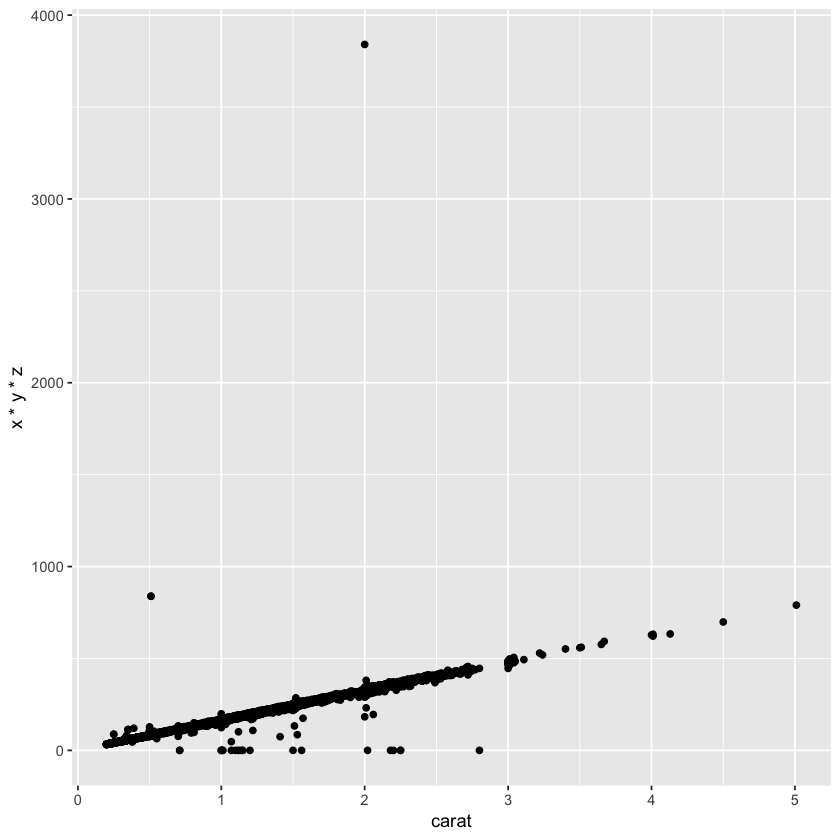

In [5]:
#relationship between volume of diamond (approximated by x*y*z) and its weight 
qplot(carat,x*y*z,data=diamonds)

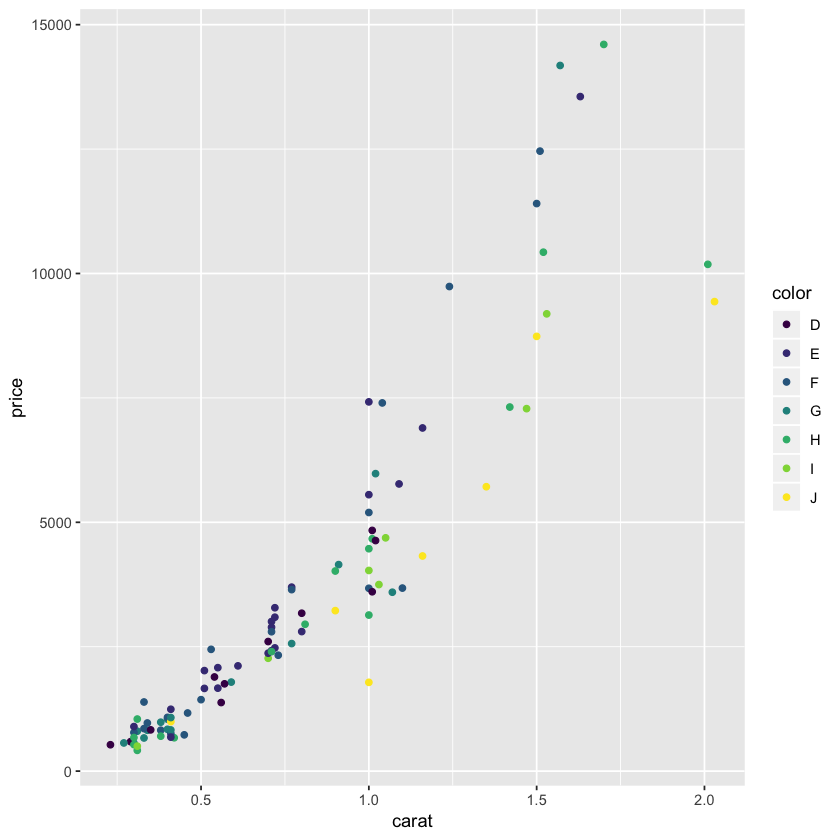

In [6]:
#color, size, shape and other aesthetic attributes 
#colour
qplot(carat,price,data=dsmall,colour=color)

Warning message:
“Using shapes for an ordinal variable is not advised”

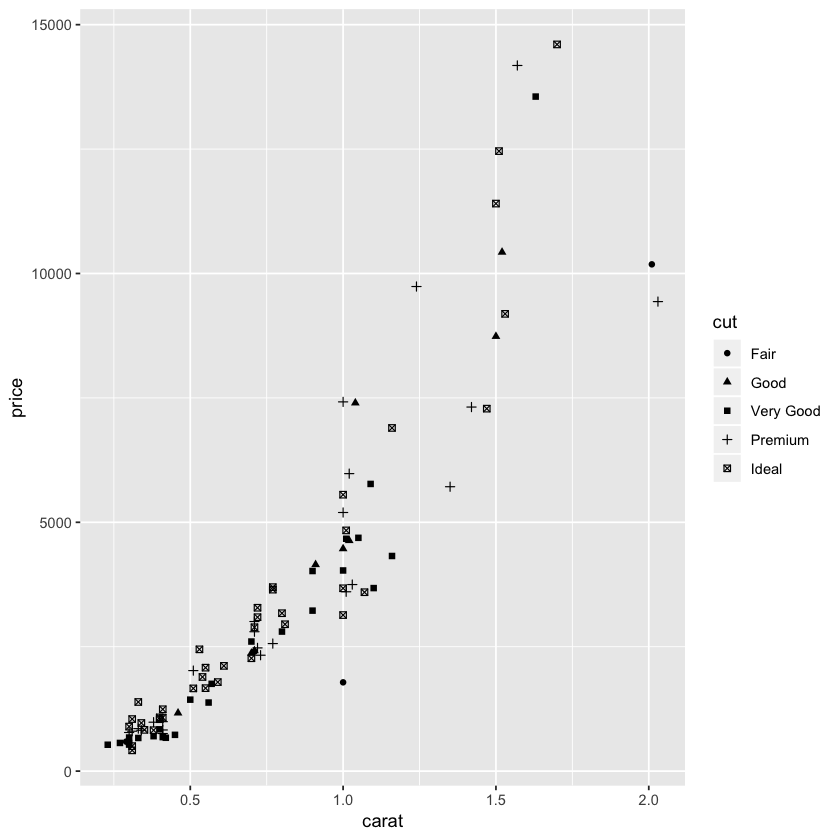

In [7]:
#cut
qplot(carat,price,data=dsmall,shape=cut)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


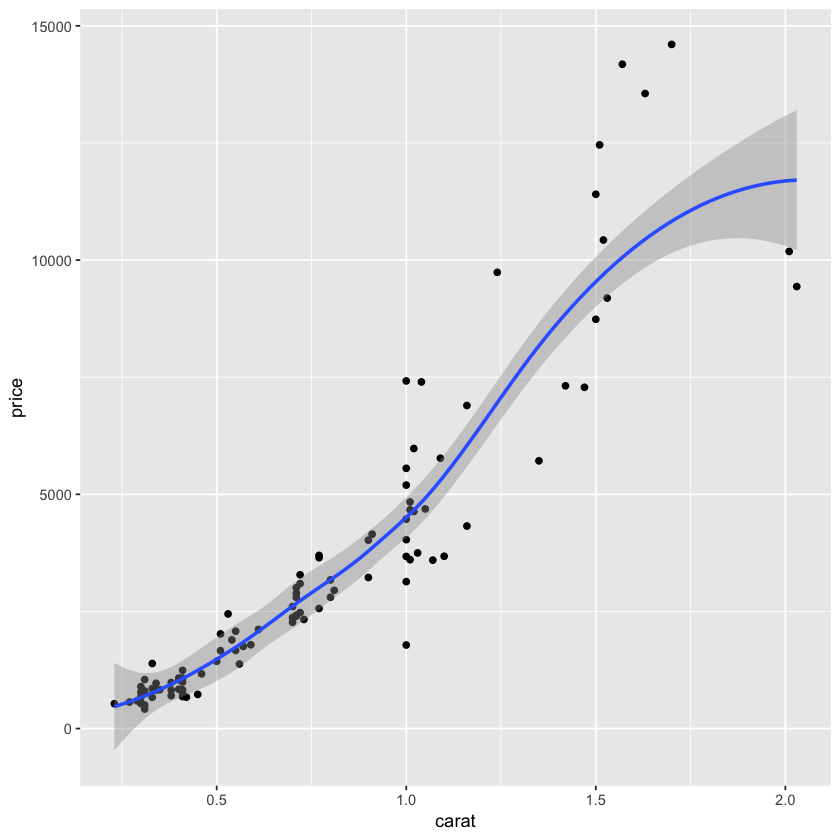

In [8]:
#geom with small data 
qplot(carat,price,data=dsmall,geom=c("point","smooth"))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


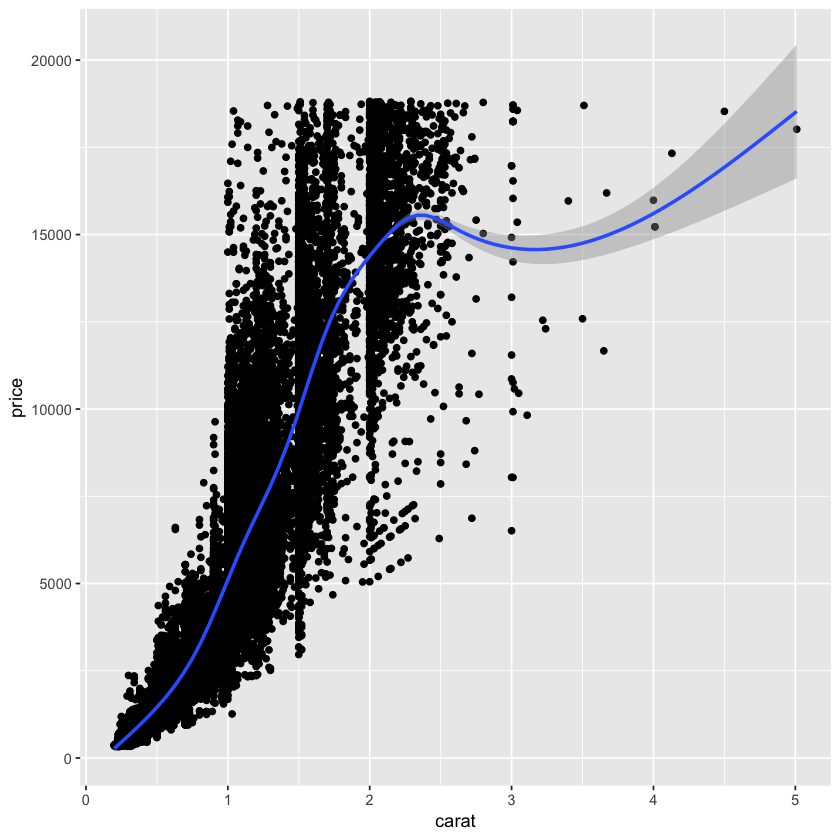

In [9]:
#geom with all data 
#geom is called geometric objects. 
#it perform the actual rendering of the layer, control the type of plot 
#for example using a point geom you will creae a scatterplot
#while using a line geom you will create a line plot. 
#stat or statistical transformation, or stat, transforms the data
# it does typically by summarizing it in some manner, like bin, boxplot, smooth
qplot(carat,price,data=diamonds,geom=c("point","smooth"))

Warning message:
“Ignoring unknown parameters: method”

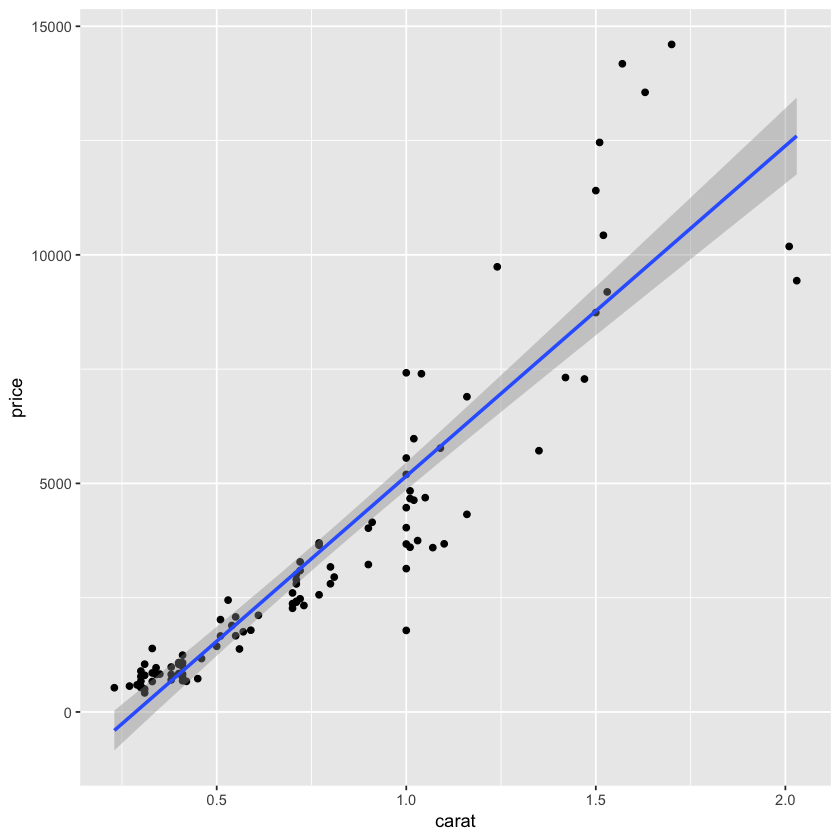

In [10]:
#smoothing with linear model dsmall
qplot(carat,price,data=dsmall,geom=c("point","smooth"),method= "lm")



Warning message:
“Ignoring unknown parameters: method”

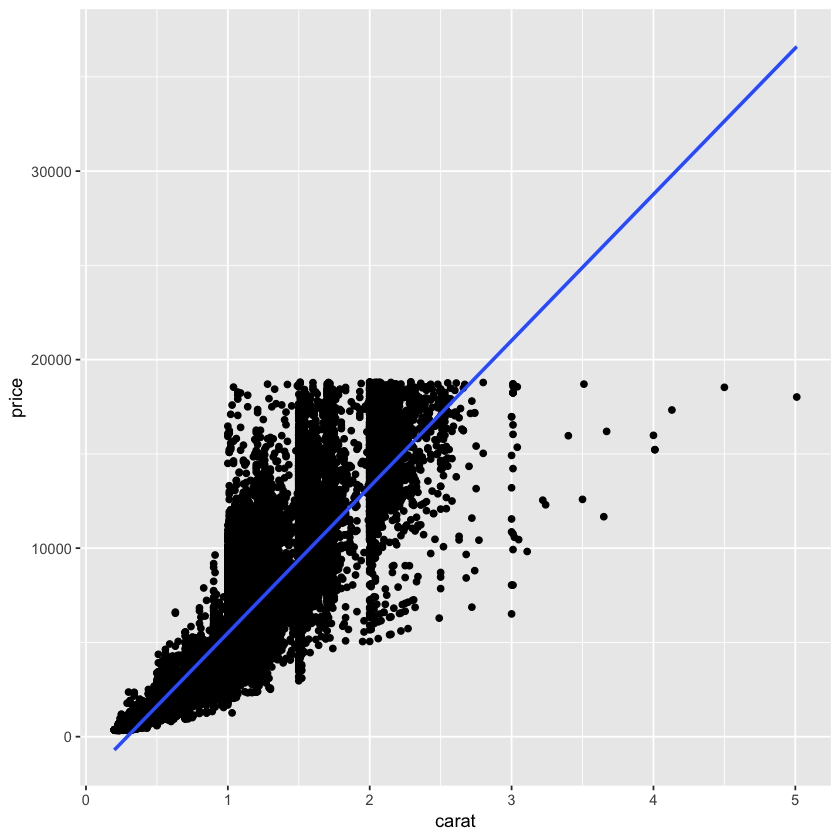

In [11]:
#smoothing with linear model dsmall
qplot(carat,price,data=diamonds,geom=c("point","smooth"),method= "lm")

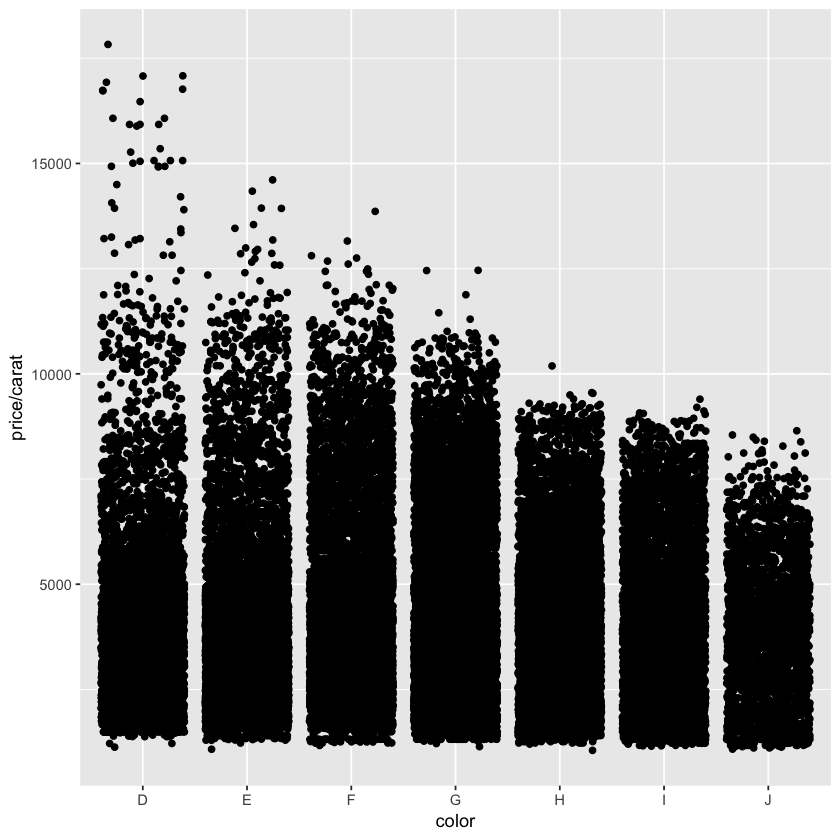

In [12]:
#boxplot 
qplot(color,price/carat,data=diamonds,geom="jitter")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


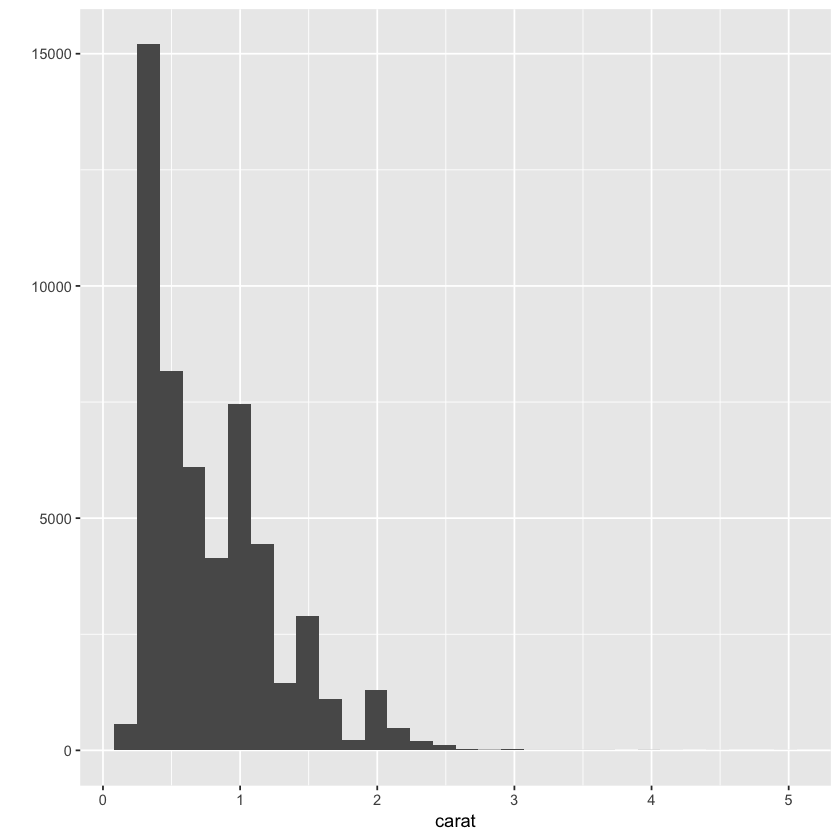

In [13]:
#histogram to display distribution 
qplot(carat,data=diamonds,geom="histogram")

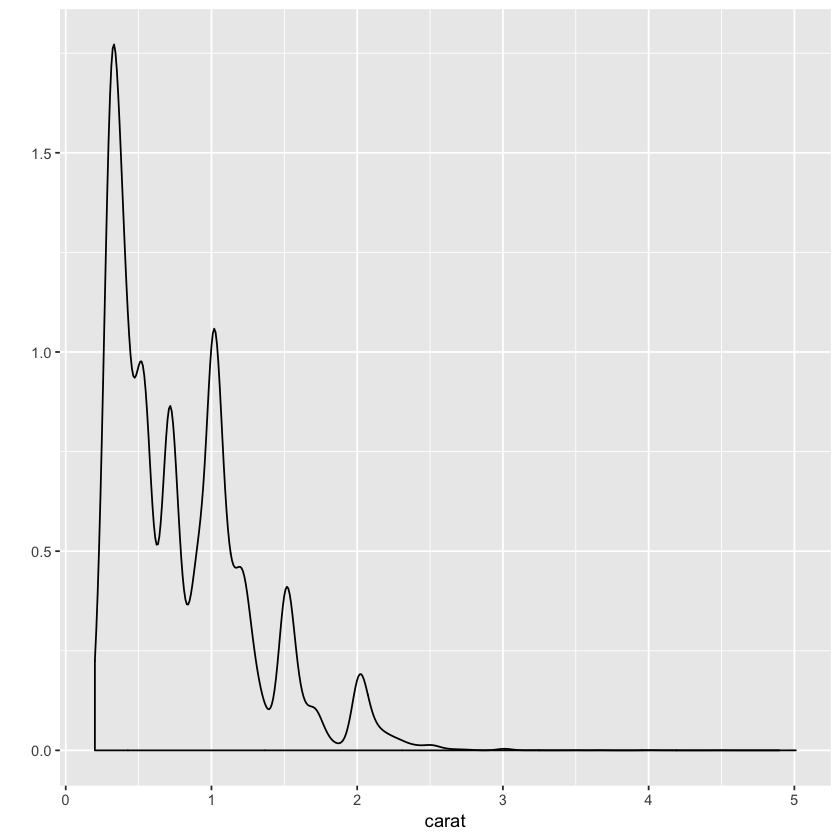

In [14]:
#density 
qplot(carat,data=diamonds,geom="density")

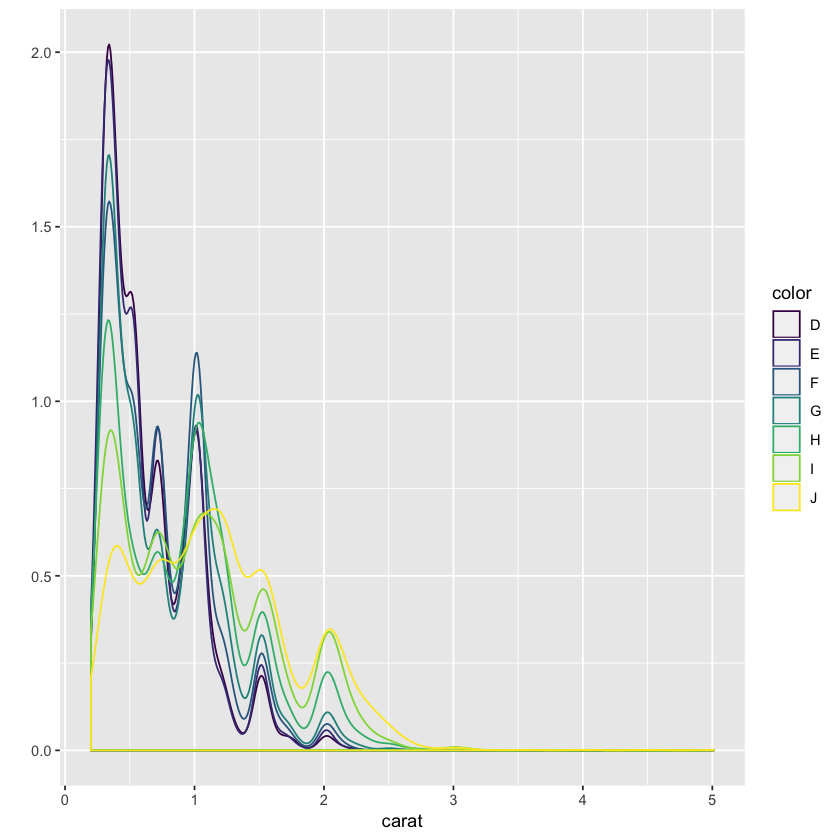

In [15]:
#to compare the distribution of different subgroups, just add an aesthetic mapping

qplot(carat,data=diamonds,geom="density",color=color)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


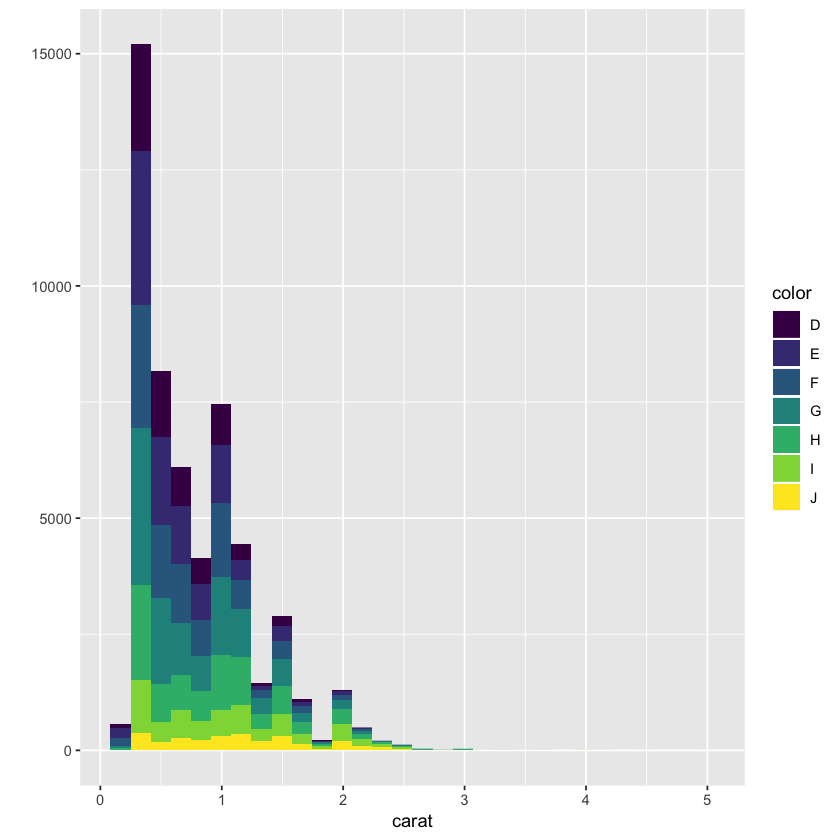

In [16]:
qplot(carat,data=diamonds,geom="histogram",fill=color)

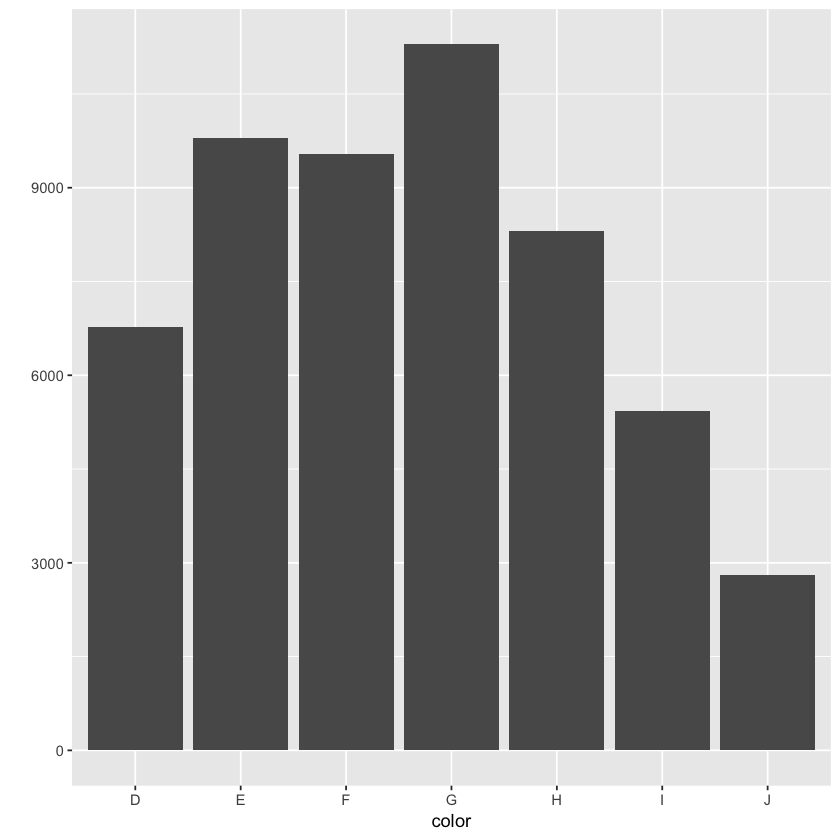

In [17]:
#bar chart ( the discrete analogue of histogram is called the bar chart)

qplot(color, data = diamonds, geom = "bar")

In [18]:
 
summary(economics)

      date                 pce               pop            psavert      
 Min.   :1967-07-01   Min.   :  507.4   Min.   :198712   Min.   : 1.900  
 1st Qu.:1979-06-08   1st Qu.: 1582.2   1st Qu.:224896   1st Qu.: 5.500  
 Median :1991-05-16   Median : 3953.6   Median :253060   Median : 7.700  
 Mean   :1991-05-17   Mean   : 4843.5   Mean   :257189   Mean   : 7.937  
 3rd Qu.:2003-04-23   3rd Qu.: 7667.3   3rd Qu.:290291   3rd Qu.:10.500  
 Max.   :2015-04-01   Max.   :12161.5   Max.   :320887   Max.   :17.000  
    uempmed         unemploy    
 Min.   : 4.00   Min.   : 2685  
 1st Qu.: 6.00   1st Qu.: 6284  
 Median : 7.50   Median : 7494  
 Mean   : 8.61   Mean   : 7772  
 3rd Qu.: 9.10   3rd Qu.: 8691  
 Max.   :25.20   Max.   :15352  

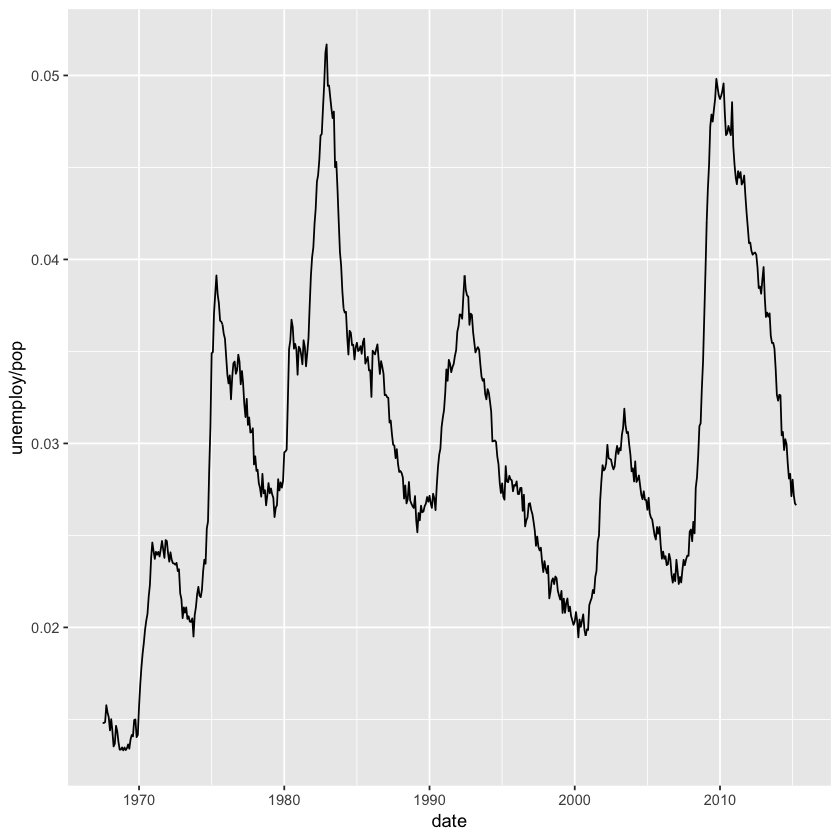

In [19]:
#time series with line and path plots
#line plots join the points from left to right.
qplot(date, unemploy / pop, data = economics, geom = "line")

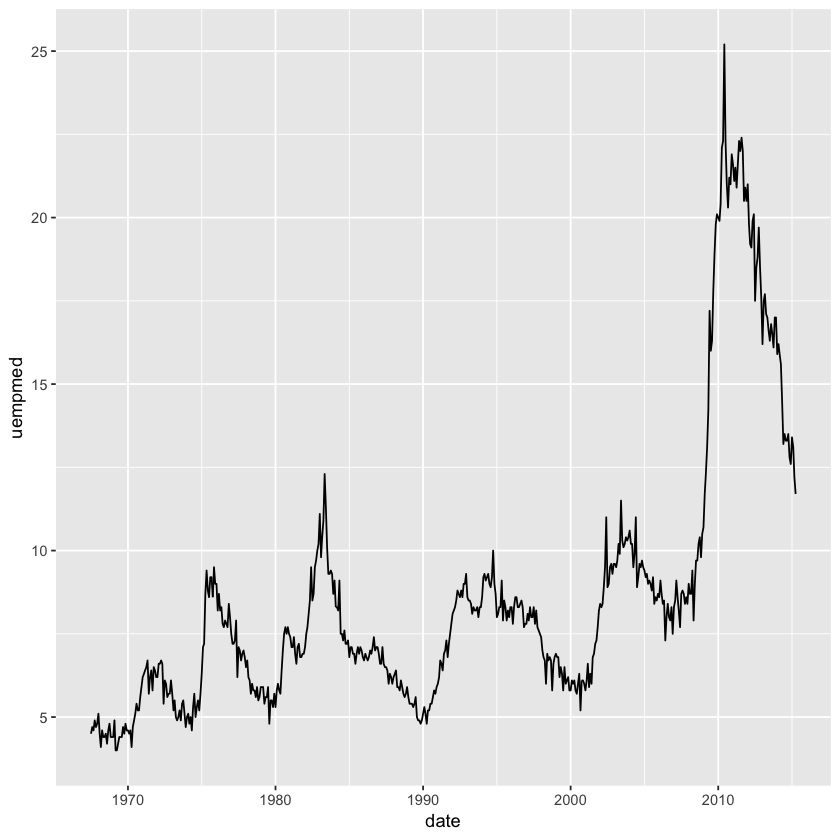

In [20]:
# median number of weeks unemployed

qplot(date, uempmed, data = economics, geom = "line")

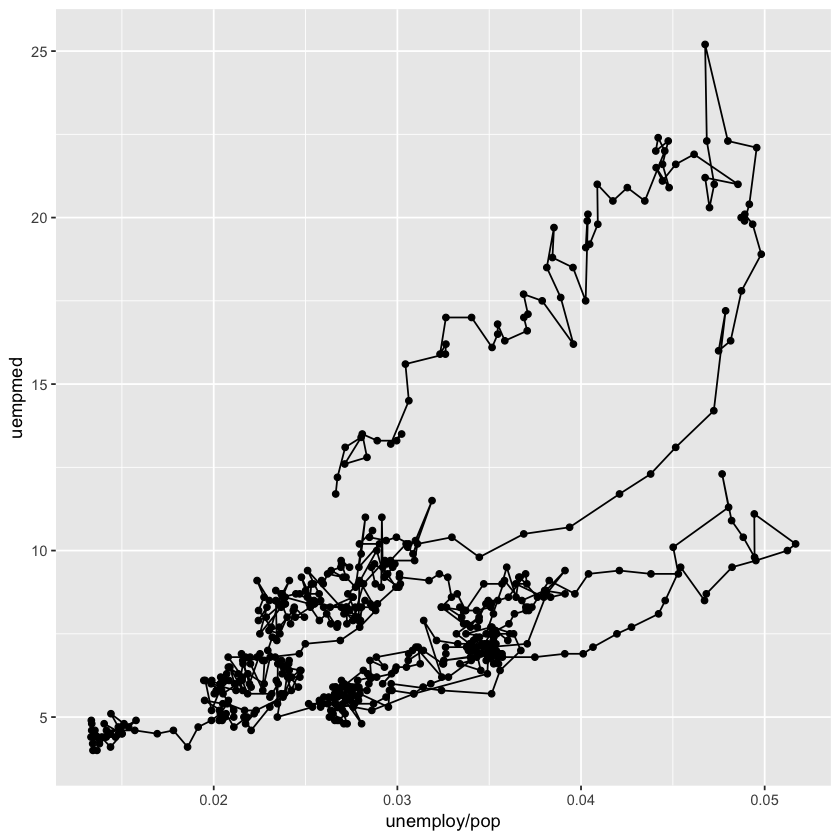

In [21]:
#umemployment percentage vis a vis median number of unemployed. 
# we are drawing scatter plot. 

qplot(unemploy / pop, uempmed, data = economics,
geom = c("point", "path"))

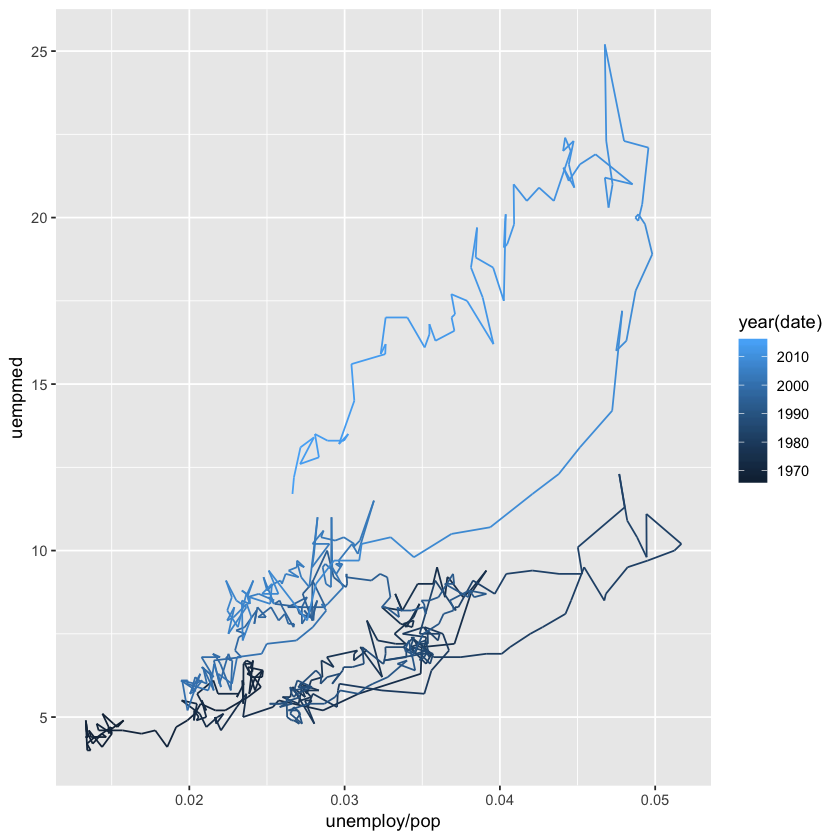

In [31]:
#But in the above scatter plot we could no longer see the evolution over time. 
#The solution is to join points adjacent in time with line segments, 
#forming a path model.
#we need to first write a function for year, where we convert years in decades. 
year <- function(x) as.POSIXlt(x)$year + 1900

qplot(unemploy / pop, uempmed, data = economics,
geom = "path", colour = year(date))


In [41]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [40]:
# Break 
#qplot created a plot object, added layers, and displayed using many default values. 
#to create the plot object ourselves, we use ggplot()
#aes is used to describe the way that variables in the data are mapped 
# i.e, the way that we can perceive on the plot. 
p <- ggplot(mtcars, aes(mpg, wt, colour = cyl))

In [43]:
#layers
p <- p + geom_point()

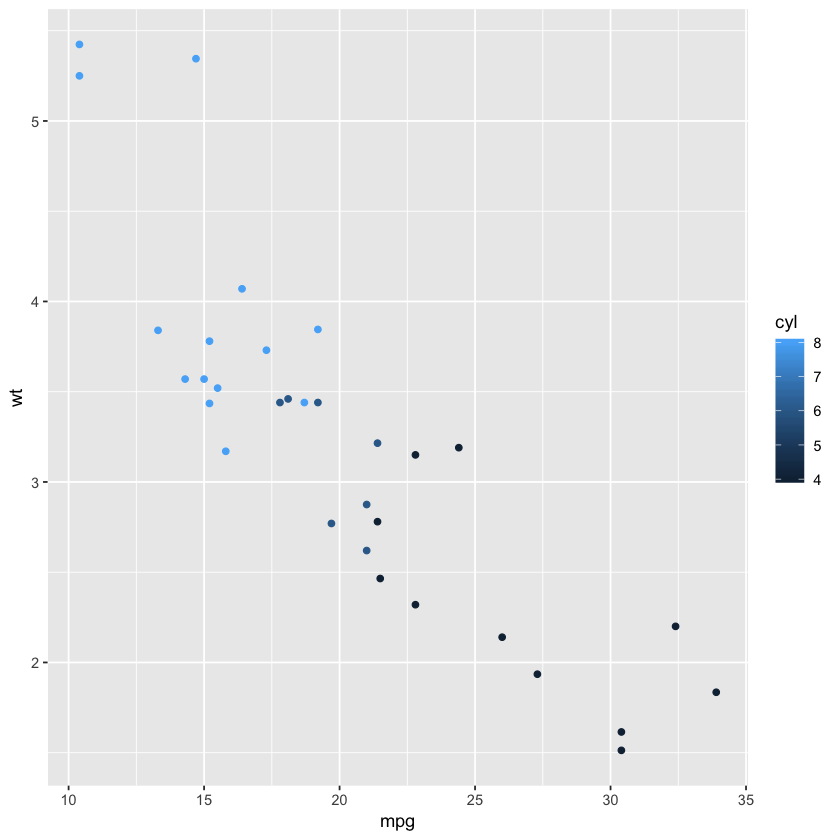

In [44]:
p

In [45]:
p <- ggplot(mtcars, aes(mpg, wt))

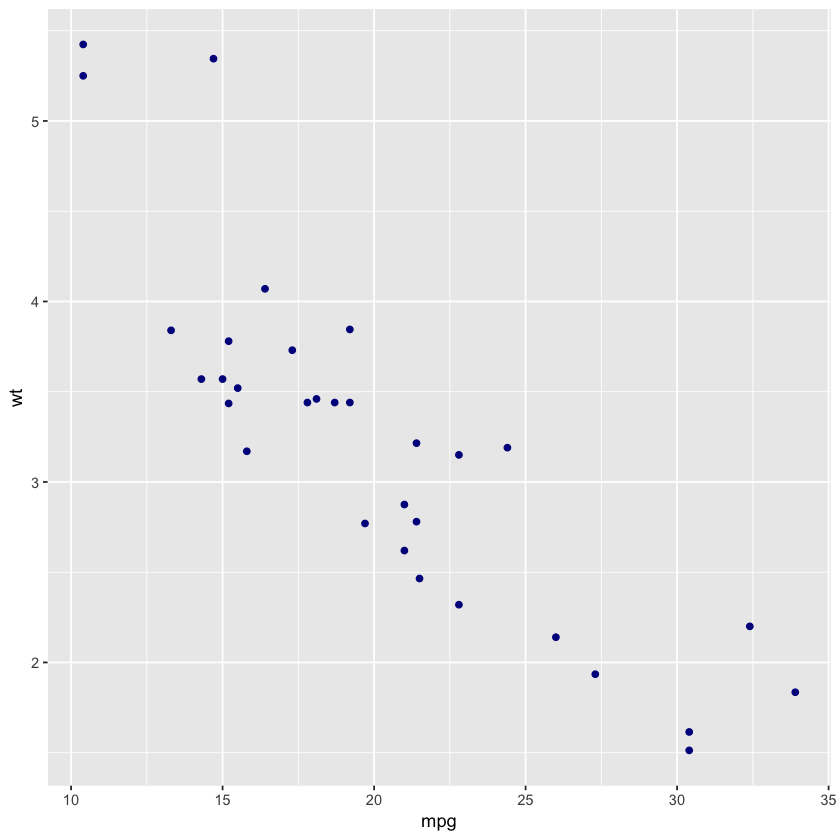

In [46]:
p + geom_point(colour = "darkblue")

In [47]:
summary(Oxboys)

ERROR: Error in summary(Oxboys): object 'Oxboys' not found


In [48]:

summary(Oxboys)

Loading required package: lme4
Loading required package: Matrix


    Subject         age               height         Occasion 
 1      :  9   Min.   :-1.00000   Min.   :126.2   1      :26  
 10     :  9   1st Qu.:-0.46300   1st Qu.:143.8   2      :26  
 11     :  9   Median :-0.00270   Median :149.5   3      :26  
 12     :  9   Mean   : 0.02263   Mean   :149.5   4      :26  
 13     :  9   3rd Qu.: 0.55620   3rd Qu.:155.5   5      :26  
 14     :  9   Max.   : 1.00550   Max.   :174.8   6      :26  
 (Other):180                                      (Other):78  

In [49]:


p <- ggplot(Oxboys, aes(age, height, group = Subject))

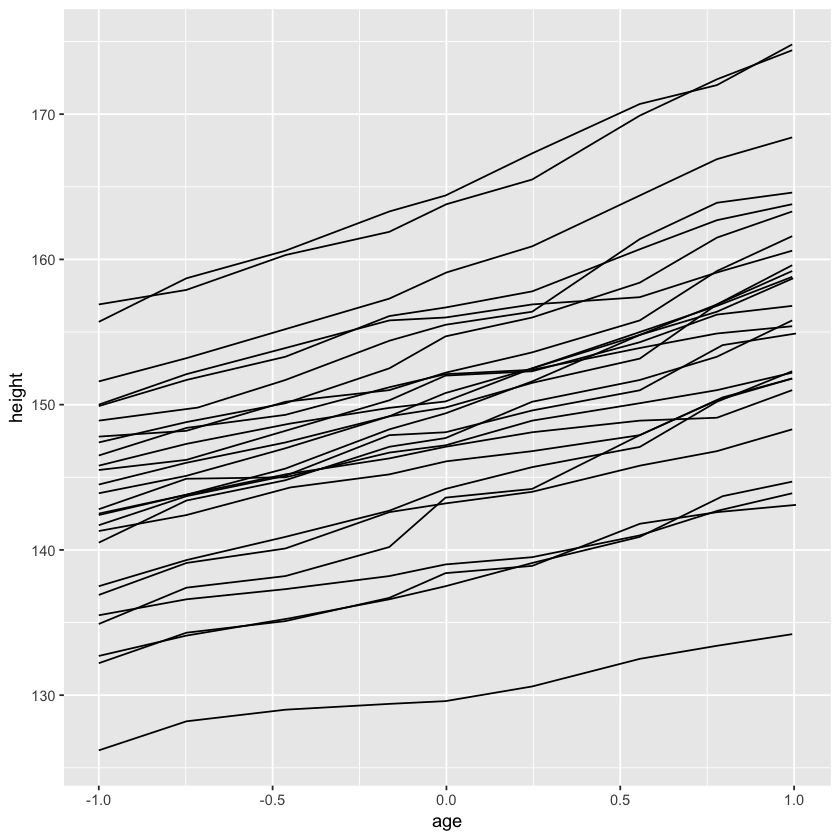

In [50]:
p+geom_line()

In [51]:
p1<-p+geom_line()


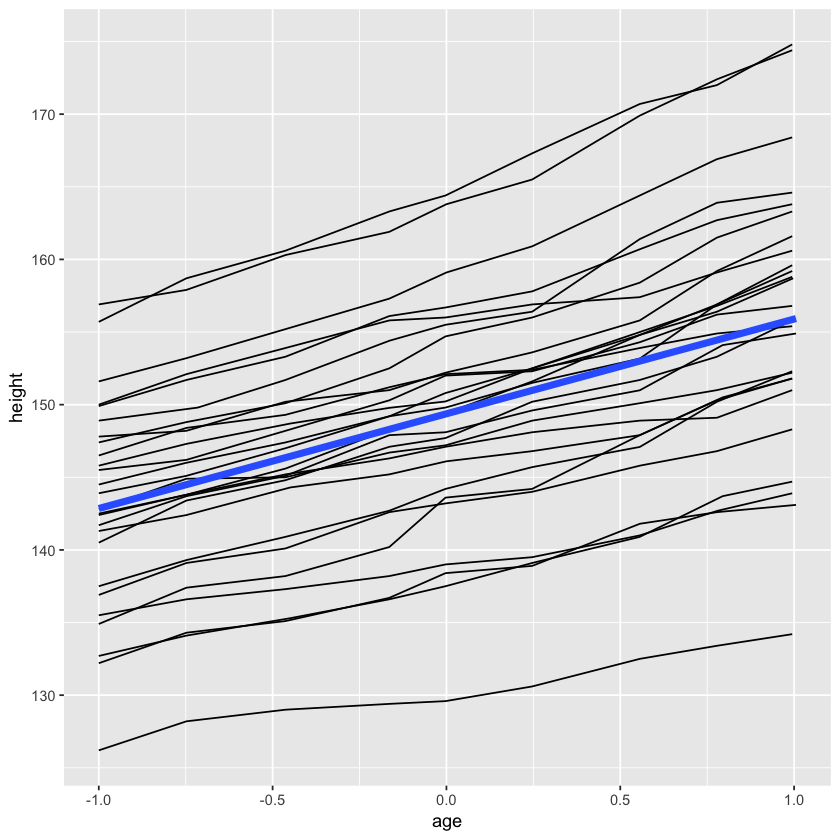

In [52]:
p1+geom_smooth(aes(group=1),method="lm",size=2,se=F)

In [54]:
d <- ggplot(diamonds, aes(carat)) + xlim(0, 3)


Warning message:
“Ignoring unknown aesthetics: ymax”Warning message:
“Removed 32 rows containing non-finite values (stat_bin).”

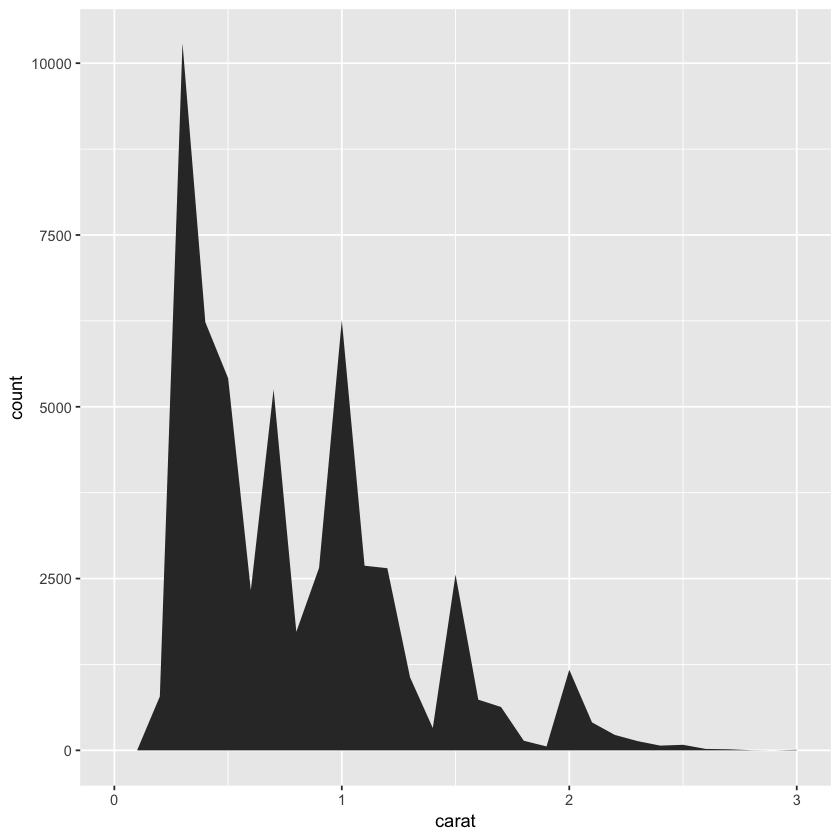

In [55]:
d + stat_bin(aes(ymax = ..count..), binwidth = 0.1, geom = "area")

Warning message:
“Removed 32 rows containing non-finite values (stat_bin).”

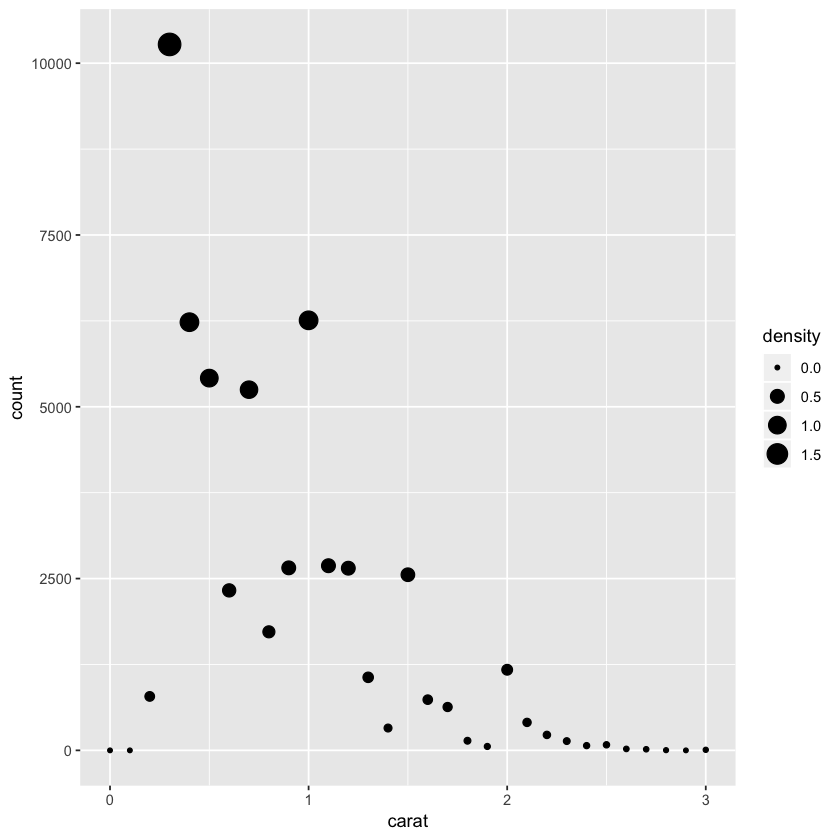

In [56]:
d + stat_bin(
aes(size = ..density..), binwidth = 0.1,
geom = "point", position="identity"

)